In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 통계 분석 패키지
from scipy import stats
import scipy.stats

from scipy.stats import shapiro # 정규성 검증
from statsmodels.formula.api import ols # 회귀분석
# proportion test 패키지
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency #카이제곱 검정
from scipy.stats import bartlett

# 주성분 분석
from sklearn.decomposition import PCA
# 회귀분석
import statsmodels.api as sm

# linkage: 계층형 군집분석, dendrogram: 계층구조 나무, cluster: linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
# 군집 방법 : AgglomerativeClustering(계층형), KMeans(k-평균), DBSCAN
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

# 실루엣(Silhouette) 계수 산출
from sklearn.metrics import silhouette_samples, silhouette_score
# 실루엣 계수 산출 및 시각화 라이브러리 (pip install yellowbrick 실행)
from yellowbrick.cluster import SilhouetteVisualizer

# 데이터 전처리 : 항목 값에 대한 index 생성
from mlxtend.preprocessing import TransactionEncoder
# 지지도 계산
from mlxtend.frequent_patterns import apriori
# 연관 규칙
from mlxtend.frequent_patterns import association_rules

In [2]:
%matplotlib inline

#import matplotlib.pyplot as plt

# 맑은 고딕 적용
matplotlib.rc("font", family = "NaNumGothic")

# 음수 표시
# -값 표시
matplotlib.rc('axes', unicode_minus=False)

In [3]:
df_orders=pd.read_csv("./on_orders.csv", encoding="cp949")
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [4]:
df_items=pd.read_csv("./on_items.csv", encoding="cp949")
df_items

,ItemLargeCode,ItemLargeName,ItemMiddleCode,ItemMiddleName,ItemSmallCode,ItemSmallName,ItemCode,ItemName,PriceYear,PriceMin,PriceMax
0,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2021,15840,16130
1,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2022,17030,17340
2,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1001,(식품)샘표 김치국수 101g 10입,2023,17380,18640
3,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2022,14160,15350
4,L1,가공식품,M11,곡물,S0080,국수,L1-M11-S0080-1002,2.1kg 6배 메밀 Bestco 희석용 소바 국수장국,2023,15060,16160
...,...,...,...,...,...,...,...,...,...,...,...
10049,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2022,7180,7790
10050,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1053,한국 탄산음료 코카콜라 1.5L,2021,6820,7320
10051,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2023,15890,17050
10052,L5,음료,M25,탄산,S0630,탄산음료,L5-M25-S0630-1054,환타 오렌지 190ml x 30캔 / 탄산음료 음료수,2022,14780,16370


In [5]:
df_users=pd.read_csv("./on_users.csv", encoding="cp949")
df_users

,idUser,Gender,Age,FamilyCount,MemberYN
0,U10001,여성,26,2,Y
1,U10002,남성,61,2,Y
2,U10003,여성,34,2,Y
3,U10004,남성,26,1,N
4,U10005,여성,33,3,Y
...,...,...,...,...,...
2995,U12996,여성,66,2,N
2996,U12997,남성,24,2,Y
2997,U12998,남성,31,2,Y
2998,U12999,여성,32,1,Y


- 연관분석 

In [6]:
# 1. 고객별로 어떤 상품을 구매했는지 나타내는 이진 매트릭스 생성
basket = df_orders.groupby(['idUser', 'ItemCode']).size().unstack(fill_value=0)

# 2. 이제 basket은 각 고객의 상품 구매 여부를 이진값으로 나타낸 데이터프레임
print(basket)

ItemCode  L1-M11-S0080-1001  L1-M11-S0080-1002  L1-M11-S0080-1003  \
idUser                                                              
U10001                    0                  0                  0   
U10002                    0                  0                  0   
U10003                    0                  0                  0   
U10004                    0                  0                  0   
U10005                    0                  0                  0   
...                     ...                ...                ...   
U12996                    0                  0                  0   
U12997                    0                  0                  0   
U12998                    0                  0                  0   
U12999                    0                  0                  0   
U13000                    0                  0                  0   

ItemCode  L1-M11-S0080-1004  L1-M11-S0080-1005  L1-M11-S0080-1006  \
idUser                           

In [10]:
# 주문별로 ItemCode를 리스트로 묶기 (주문 ID 기준으로 groupby)
transactions = df_orders.groupby(['idOrder','idUser'])['ItemCode'].apply(list).reset_index()

# 주문별로 묶인 품목 리스트 출력
print(transactions)

# # TransactionEncoder 사용하여 트랜잭션 데이터로 변환
# te = TransactionEncoder()
# te_ary = te.fit(transactions['ItemCode']).transform(transactions['ItemCode'])

# # 희소 행렬로 변환된 결과
# df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# # 연관 규칙 분석
# frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # 결과 출력
# print(rules)

                  idOrder  idUser  \
0       U10001-O2021-1001  U10001   
1       U10001-O2021-1002  U10001   
2       U10001-O2021-1003  U10001   
3       U10001-O2021-1004  U10001   
4       U10001-O2021-1005  U10001   
...                   ...     ...   
171965  U13000-O2023-1016  U13000   
171966  U13000-O2023-1017  U13000   
171967  U13000-O2023-1018  U13000   
171968  U13000-O2023-1019  U13000   
171969  U13000-O2023-1020  U13000   

                                                 ItemCode  
0       [L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-...  
1       [L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...  
2       [L4-M12-S0640-1057, L4-M12-S0350-1002, L1-M11-...  
3       [L4-M12-S0200-1021, L3-M16-S0390-1051, L1-M11-...  
4       [L1-M11-S0340-1017, L4-M22-S0700-1019, L1-M15-...  
...                                                   ...  
171965  [L4-M22-S0700-1054, L4-M22-S0360-1062, L4-M12-...  
171966  [L4-M22-S0700-1061, L1-M12-S0200-1009, L1-M21-...  
171967  [L5-M20

In [11]:
transactions

,idOrder,idUser,ItemCode
0,U10001-O2021-1001,U10001,"[L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-..."
1,U10001-O2021-1002,U10001,"[L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-..."
2,U10001-O2021-1003,U10001,"[L4-M12-S0640-1057, L4-M12-S0350-1002, L1-M11-..."
3,U10001-O2021-1004,U10001,"[L4-M12-S0200-1021, L3-M16-S0390-1051, L1-M11-..."
4,U10001-O2021-1005,U10001,"[L1-M11-S0340-1017, L4-M22-S0700-1019, L1-M15-..."
...,...,...,...
171965,U13000-O2023-1016,U13000,"[L4-M22-S0700-1054, L4-M22-S0360-1062, L4-M12-..."
171966,U13000-O2023-1017,U13000,"[L4-M22-S0700-1061, L1-M12-S0200-1009, L1-M21-..."
171967,U13000-O2023-1018,U13000,"[L5-M20-S0720-1042, L4-M22-S0680-1025, L4-M22-..."
171968,U13000-O2023-1019,U13000,"[L4-M17-S0130-1003, L4-M12-S0350-1099, L1-M23-..."


In [14]:
def extract_middle_category(item_code):
    # "-" 기준으로 split하고, 두 번째 요소인 중분류 (M18 등) 추출
    return item_code.split("-")[1]

def extract_middle_categories_from_list(item_codes):
    # 각 아이템 코드에서 중분류만 추출하여 리스트로 반환
    return [extract_middle_category(code) for code in item_codes]

# 각 주문별로 중분류 코드 리스트 만들기
transactions['MiddleCategories'] = transactions['ItemCode'].apply(extract_middle_categories_from_list)


In [15]:
transactions

,idOrder,idUser,ItemCode,MiddleCategories
0,U10001-O2021-1001,U10001,"[L4-M17-S0530-1019, L4-M18-S0110-1012, L1-M15-...","[M17, M18, M15, M23, M17, M12, M12]"
1,U10001-O2021-1002,U10001,"[L4-M17-S0530-1024, L1-M21-S0540-1082, L1-M15-...","[M17, M21, M15, M12]"
2,U10001-O2021-1003,U10001,"[L4-M12-S0640-1057, L4-M12-S0350-1002, L1-M11-...","[M12, M12, M11, M17]"
3,U10001-O2021-1004,U10001,"[L4-M12-S0200-1021, L3-M16-S0390-1051, L1-M11-...","[M12, M16, M11, M12]"
4,U10001-O2021-1005,U10001,"[L1-M11-S0340-1017, L4-M22-S0700-1019, L1-M15-...","[M11, M22, M15, M22, M19, M13, M21]"
...,...,...,...,...
171965,U13000-O2023-1016,U13000,"[L4-M22-S0700-1054, L4-M22-S0360-1062, L4-M12-...","[M22, M22, M12, M21, M17, M11]"
171966,U13000-O2023-1017,U13000,"[L4-M22-S0700-1061, L1-M12-S0200-1009, L1-M21-...","[M22, M12, M21, M19, M15]"
171967,U13000-O2023-1018,U13000,"[L5-M20-S0720-1042, L4-M22-S0680-1025, L4-M22-...","[M20, M22, M22, M23, M12]"
171968,U13000-O2023-1019,U13000,"[L4-M17-S0130-1003, L4-M12-S0350-1099, L1-M23-...","[M17, M12, M23, M17]"


In [16]:
# TransactionEncoder 사용하여 트랜잭션 데이터를 희소 행렬로 변환
te = TransactionEncoder()
te_ary = te.fit(transactions['MiddleCategories']).transform(transactions['MiddleCategories'])

# 변환된 희소 행렬을 DataFrame으로 변환
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# 희소 행렬 확인 (중분류 코드가 해당 주문에 포함되면 1, 아니면 0)
print(df_encoded)

# 빈번한 항목 집합(frequent itemsets) 찾기
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)

# 빈번한 항목 집합 출력
print("\nFrequent Itemsets:")
print(frequent_itemsets)

# 연관 규칙 생성 (lift, confidence 등 기준으로 규칙 도출)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 생성된 연관 규칙 출력
print("\nAssociation Rules:")
print(rules)

          M11    M12    M13    M15    M16    M17    M18    M19    M20    M21  \
0       False   True  False   True  False   True   True  False  False  False   
1       False   True  False   True  False   True  False  False  False   True   
2        True   True  False  False  False   True  False  False  False  False   
3        True   True  False  False   True  False  False  False  False  False   
4        True  False   True   True  False  False  False   True  False   True   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
171965   True   True  False  False  False   True  False  False  False   True   
171966  False   True  False   True  False  False  False   True  False   True   
171967  False   True  False  False  False  False  False  False   True  False   
171968  False   True  False  False  False   True  False  False  False  False   
171969  False   True  False   True  False   True  False  False  False   True   

          M22    M23    M24    M25  
0 

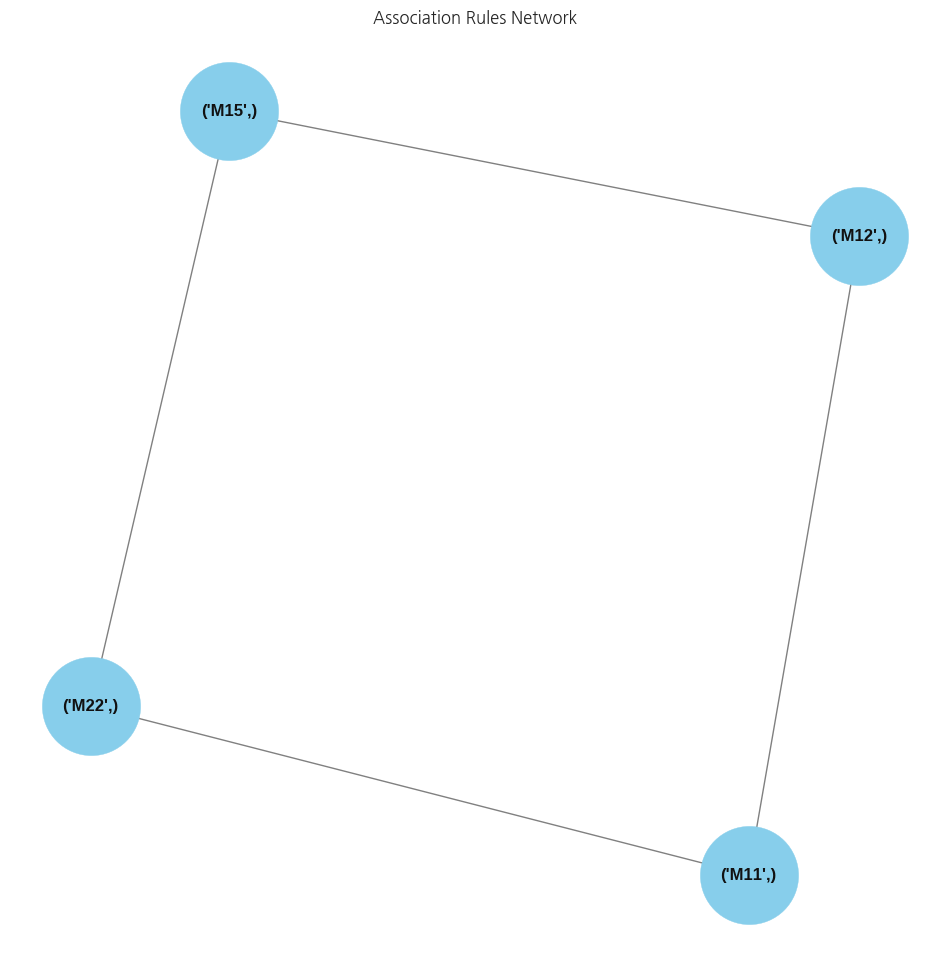

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules

# 연관 규칙을 생성합니다.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# 네트워크 그래프 생성
G = nx.Graph()

# 연관 규칙을 그래프의 엣지로 추가 (antecedent -> consequent)
for _, rule in rules.iterrows():
    # frozenset을 tuple로 변환하여 그래프에 추가
    antecedents = tuple(rule['antecedents'])
    consequents = tuple(rule['consequents'])
    
    # 엣지를 추가하면서 'lift' 값을 weight로 설정
    G.add_edge(antecedents, consequents, weight=rule['lift'])

# 그래프 레이아웃 설정
pos = nx.spring_layout(G, k=0.15, iterations=20)  # 레이아웃 튜닝

# 명시적으로 ax 객체를 생성
fig, ax = plt.subplots(figsize=(12, 12))

# 그래프 그리기, ax를 명시적으로 전달
nx.draw(G, pos, ax=ax, with_labels=True, node_size=5000, node_color="skyblue", font_size=12, font_weight="bold", width=1.0, edge_color='gray')

# 그래프 제목 설정
plt.title('Association Rules Network')

# 그래프 출력
plt.show()


In [26]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(M12),(M11),0.692382,0.341153,0.238344,0.344237,1.009042,0.002136,1.004704,0.029132
1,(M11),(M12),0.341153,0.692382,0.238344,0.698643,1.009042,0.002136,1.020775,0.013602
2,(M22),(M11),0.648985,0.341153,0.225301,0.347159,1.017606,0.003898,1.009200,0.049289
3,(M11),(M22),0.341153,0.648985,0.225301,0.660411,1.017606,0.003898,1.033646,0.026260
4,(M15),(M12),0.326726,0.692382,0.227598,0.696602,1.006095,0.001379,1.013909,0.008998
5,(M12),(M15),0.692382,0.326726,0.227598,0.328717,1.006095,0.001379,1.002967,0.019693
6,(M15),(M22),0.326726,0.648985,0.213880,0.654618,1.008679,0.001840,1.016308,0.012779
7,(M22),(M15),0.648985,0.326726,0.213880,0.329561,1.008679,0.001840,1.004229,0.024512


In [35]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# 1. df_orders에서 소분류 코드만 추출하여 새로운 DataFrame 생성
df_small = df_orders.copy()  # 원본 df_orders를 수정하지 않도록 복사본 생성
df_small['ItemSmallCode'] = df_small['ItemCode'].apply(lambda x: x.split("-")[2])  # 소분류 코드 추출

# 2. 주문별로 소분류 코드 리스트 만들기
transactions_small = df_small.groupby(['idOrder', 'idUser'])['ItemSmallCode'].apply(list).reset_index()

# 3. TransactionEncoder로 데이터를 one-hot 인코딩 형태로 변환
te = TransactionEncoder()
te_ary = te.fit(transactions_small['ItemSmallCode']).transform(transactions_small['ItemSmallCode'])
df_onehot = pd.DataFrame(te_ary, columns=te.columns_)

# 4. apriori로 빈번한 아이템 집합 찾기 (소분류 코드 기준)
frequent_itemsets_small = apriori(df_onehot, min_support=0.1, use_colnames=True)

# 빈번한 아이템 집합 출력
print(frequent_itemsets_small)

# 4. association_rules로 연관 규칙 생성
rules_small = association_rules(frequent_itemsets_small, metric="lift", min_threshold=1)

# 연관 규칙 결과 출력
print(rules_small)


     support itemsets
0   0.217945  (S0020)
1   0.149107  (S0030)
2   0.148822  (S0100)
3   0.187411  (S0110)
4   0.326726  (S0140)
5   0.259772  (S0350)
6   0.137687  (S0360)
7   0.107414  (S0380)
8   0.173507  (S0540)
9   0.154137  (S0600)
10  0.106623  (S0620)
11  0.201407  (S0640)
12  0.123923  (S0650)
13  0.135099  (S0700)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [36]:
transactions_small

,idOrder,idUser,ItemSmallCode
0,U10001-O2021-1001,U10001,"[S0530, S0110, S0140, S0580, S0130, S0070, S0640]"
1,U10001-O2021-1002,U10001,"[S0530, S0540, S0140, S0350]"
2,U10001-O2021-1003,U10001,"[S0640, S0350, S0220, S0100]"
3,U10001-O2021-1004,U10001,"[S0200, S0390, S0280, S0350]"
4,U10001-O2021-1005,U10001,"[S0340, S0700, S0140, S0670, S0190, S0440, S0540]"
...,...,...,...
171965,U13000-O2023-1016,U13000,"[S0700, S0360, S0620, S0540, S0260, S0340]"
171966,U13000-O2023-1017,U13000,"[S0700, S0200, S0540, S0520, S0140]"
171967,U13000-O2023-1018,U13000,"[S0720, S0680, S0650, S0420, S0070]"
171968,U13000-O2023-1019,U13000,"[S0130, S0350, S0580, S0100]"


In [39]:
df_orders

,idUser,idOrder,OrderDT,ItemCode,Price,DeliveryDT
0,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M17-S0530-1024,33310,08JAN2021:06:24:00
1,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M21-S0540-1082,3780,08JAN2021:06:24:00
2,U10001,U10001-O2021-1002,07JAN21:17:08:51,L1-M15-S0140-1311,22520,08JAN2021:06:24:00
3,U10001,U10001-O2021-1002,07JAN21:17:08:51,L4-M12-S0350-1035,21630,08JAN2021:06:24:00
4,U10001,U10001-O2021-1003,14JAN21:16:50:14,L4-M12-S0640-1057,11700,15JAN2021:06:28:00
...,...,...,...,...,...,...
856618,U13000,U13000-O2023-1008,28DEC23:14:06:13,L4-M12-S0350-1063,11520,29DEC2023:04:23:00
856619,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M12-S0330-1011,18870,29DEC2023:04:23:00
856620,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M21-S0540-1161,3120,29DEC2023:04:23:00
856621,U13000,U13000-O2023-1008,28DEC23:14:06:13,L1-M17-S0030-1016,37760,29DEC2023:04:23:00


In [ ]:
df_use=df_orders.groupby(['idUser ','idOrder'])

In [42]:
# ItemCode별로 매출을 그룹화
df_grouped_sales = df_orders.groupby('ItemCode')['Price'].sum().reset_index()

# 매출이 많은 아이템 상위 3개
df_grouped_sales = df_grouped_sales.sort_values(by='Price', ascending=False)

df_grouped_sales

,ItemCode,Price
3331,L4-M18-S0110-1076,18678840
3132,L4-M17-S0030-1005,18491630
3531,L4-M22-S0360-1058,18356600
3176,L4-M17-S0130-1013,18284380
3175,L4-M17-S0130-1012,17688160
...,...,...
507,L1-M12-S0070-1036,79300
3892,L5-M20-S0720-1075,78820
3985,L5-M25-S0630-1050,78010
3933,L5-M20-S0720-1116,66120


In [43]:
# ItemCode별로 주문 건수를 세기
df_grouped_orders = df_orders.groupby('ItemCode')['idOrder'].nunique().reset_index()

# 주문 건수가 많은 아이템 상위 3개
df_grouped_orders = df_grouped_orders.sort_values(by='idOrder', ascending=False)

print(df_grouped_orders)

               ItemCode  idOrder
2806  L4-M12-S0290-1017      533
3199  L4-M17-S0130-1036      530
3187  L4-M17-S0130-1024      528
3318  L4-M18-S0110-1063      526
3139  L4-M17-S0030-1012      525
...                 ...      ...
3985  L5-M25-S0630-1050       28
3926  L5-M20-S0720-1109       27
2754  L3-M16-S0390-1046       26
3983  L5-M25-S0630-1048       23
3869  L5-M20-S0720-1052       23

[3989 rows x 2 columns]


In [44]:
# 매출과 주문 건수를 모두 고려한 DataFrame 결합
df_merged = pd.merge(df_grouped_sales, df_grouped_orders, on='ItemCode')

# 매출과 주문 건수를 기준으로 정렬
df_merged_sorted = df_merged.sort_values(by=['Price', 'idOrder'], ascending=False)

print(df_merged_sorted)

               ItemCode     Price  idOrder
0     L4-M18-S0110-1076  18678840      491
1     L4-M17-S0030-1005  18491630      494
2     L4-M22-S0360-1058  18356600      485
3     L4-M17-S0130-1013  18284380      508
4     L4-M17-S0130-1012  17688160      495
...                 ...       ...      ...
3984  L1-M12-S0070-1036     79300       50
3985  L5-M20-S0720-1075     78820       54
3986  L5-M25-S0630-1050     78010       28
3987  L5-M20-S0720-1116     66120       38
3988  L5-M20-S0720-1086     42640       31

[3989 rows x 3 columns]


In [47]:
# 1. df_items의 'ItemCode'와 'itemName'을 dict로 변환
item_name_dict = dict(zip(df_items['ItemCode'], df_items['ItemName']))

# 2. df의 'ItemCode'를 이용해 'itemName'을 추가
df_merged_sorted['ItemName'] = df_merged_sorted['ItemCode'].map(item_name_dict)


In [48]:
df_merged_sorted

,ItemCode,Price,idOrder,ItemName
0,L4-M18-S0110-1076,18678840,491,청정원 종가집 맛김치 1.9kg x 2개
1,L4-M17-S0030-1005,18491630,494,[안동수산][선물세트] 제주 순살 고등어(대) 150g x 6팩+제주 두절참조기 650
2,L4-M22-S0360-1058,18356600,485,청상추 4Kg
3,L4-M17-S0130-1013,18284380,508,국산 갯벌 낙지 중소 5마리 산소포장
4,L4-M17-S0130-1012,17688160,495,국산 갯벌 낙지 (중소) 5마리 산소포장
...,...,...,...,...
3984,L1-M12-S0070-1036,79300,50,동원 복숭아 황도슬라이스400G
3985,L5-M20-S0720-1075,78820,54,코카콜라 토레타 500ML
3986,L5-M25-S0630-1050,78010,28,펩시 콜라 1.8L
3987,L5-M20-S0720-1116,66120,38,포카리스웨트 분말 이온음료


In [51]:
# 1단계: 매출액 (Price) 기준으로 내림차순 정렬
df_sorted_by_revenue = df_merged_sorted.sort_values(by=['Price'], ascending=False)

# 상위 10개 아이템 선택 (매출액 기준)
top_10_revenue = df_sorted_by_revenue.head(10)

# 2단계: 주문건수 (idOrder) 기준으로 내림차순 정렬
df_sorted_by_orders = df_merged_sorted.sort_values(by=['idOrder'], ascending=False)

# 상위 10개 아이템 선택 (주문건수 기준)
top_10_orders = df_sorted_by_orders.head(10)

# 결과 출력
print("상위 10개 매출액 기준 아이템:")
top_10_revenue


상위 10개 매출액 기준 아이템:


,ItemCode,Price,idOrder,ItemName
0,L4-M18-S0110-1076,18678840,491,청정원 종가집 맛김치 1.9kg x 2개
1,L4-M17-S0030-1005,18491630,494,[안동수산][선물세트] 제주 순살 고등어(대) 150g x 6팩+제주 두절참조기 650
2,L4-M22-S0360-1058,18356600,485,청상추 4Kg
3,L4-M17-S0130-1013,18284380,508,국산 갯벌 낙지 중소 5마리 산소포장
4,L4-M17-S0130-1012,17688160,495,국산 갯벌 낙지 (중소) 5마리 산소포장
5,L4-M12-S0290-1006,17633760,485,[프레쉬팜] 달달 배 선물세트 2호 3.5kg(6과)
6,L4-M17-S0530-1023,17602770,480,완도 활전복 1kg 중 18-20미
7,L4-M17-S0530-1024,17601150,483,완도 활전복 1kg 중 22-25미
8,L4-M17-S0030-1024,17395980,497,명품 제주 청귤고등어 10팩(130g이상)
9,L4-M17-S0530-1003,17358770,462,[산지직송]완도 산소포장 활전복 1kg(14-16미)


In [50]:
print("\n상위 10개 주문건수 기준 아이템:")
top_10_orders


상위 10개 주문건수 기준 아이템:


,ItemCode,Price,idOrder,ItemName
294,L4-M12-S0290-1017,9085650,533,나주배 특품 5kg (6-10과) 신고배 나주직송
176,L4-M17-S0130-1036,11289660,530,참바다 손질낙지 200g(팩당/2마리) X 6팩(총12마리)
2392,L4-M17-S0130-1024,1700820,528,목포 세발낙지 신안 뻘낙지 무안 산낙지 활낙지 국산낙지 낙지볶음
1658,L4-M18-S0110-1063,2801980,526,종가집 맛김치 1kg 우리땅 소백
511,L4-M17-S0030-1012,6505320,525,고등어 400g 5캔
257,L4-M17-S0500-1002,9831040,524,[해미래 ] 국내산 손질 냉동 오징어 270g 내외 (2마리) x 2팩
52,L4-M12-S0430-1022,15098190,522,수박 지르go 신선한 겨울 하우스 고당도 임산부 꿀수박 5kg
87,L4-M18-S0110-1044,13666730,520,대상 종가집 전라도 포기김치 3.3kg
45,L4-M18-S0110-1060,15340900,519,종가집 기획세트 맛김치 1.6kg * 2ea 총 3.2kg
1310,L4-M17-S0130-1015,3457680,518,그램원 손질 절단낙지 M/L 430g / 500g 낱개


In [56]:
# 1. 'ItemCode'에서 소분류 추출하기
df_orders['SmallCategory'] = df_orders['ItemCode'].apply(lambda x: x.split("-")[2])

# 2. 소분류별 매출액 집계 (매출액 = Price의 합)
revenue_by_small_category = df_orders.groupby('SmallCategory')['Price'].sum().reset_index()

# 3. 소분류별 주문건수 집계 (주문건수 = idOrder의 갯수)
orders_by_small_category = df_orders.groupby('SmallCategory')['idOrder'].nunique().reset_index()

# 4. 매출액 상위 10개 소분류
top_10_revenue = revenue_by_small_category.nlargest(10, 'Price')

# 5. 주문건수 상위 10개 소분류
top_10_orders = orders_by_small_category.nlargest(10, 'idOrder')

# 결과 출력
print("매출액 상위 10개 소분류:")
print(top_10_revenue)

print("\n주문건수 상위 10개 소분류:")
print(top_10_orders)

매출액 상위 10개 소분류:
   SmallCategory       Price
24         S0350  1065058710
8          S0140   906827070
6          S0110   708770130
0          S0020   649038210
42         S0640   637556750
1          S0030   525231360
39         S0600   471359850
35         S0540   455416560
40         S0620   435577550
5          S0100   412543190

주문건수 상위 10개 소분류:
   SmallCategory  idOrder
8          S0140    56187
24         S0350    44673
0          S0020    37480
42         S0640    34636
6          S0110    32229
35         S0540    29838
39         S0600    26507
1          S0030    25642
5          S0100    25593
25         S0360    23678


In [53]:
top_10_orders['idOrder'].sum()

336463

In [57]:
# 1. df_items에서 ItemSmallCode와 ItemSmallName을 딕셔너리로 변환
category_dict = df_items.set_index('ItemSmallCode')['ItemSmallName'].to_dict()

# 2. top_10_revenue와 top_10_orders 데이터프레임에 ItemSmallName 추가
top_10_revenue['ItemSmallName'] = top_10_revenue['SmallCategory'].map(category_dict)
top_10_orders['ItemSmallName'] = top_10_orders['SmallCategory'].map(category_dict)

# 결과 출력
print("매출액 상위 10개 소분류 (소분류명 추가):")
print(top_10_revenue[['SmallCategory', 'ItemSmallName', 'Price']])

print("\n주문건수 상위 10개 소분류 (소분류명 추가):")
print(top_10_orders[['SmallCategory', 'ItemSmallName', 'idOrder']])


매출액 상위 10개 소분류 (소분류명 추가):
   SmallCategory ItemSmallName       Price
24         S0350            사과  1065058710
8          S0140            냉동   906827070
6          S0110            김치   708770130
0          S0020           고구마   649038210
42         S0640           토마토   637556750
1          S0030           고등어   525231360
39         S0600            커피   471359850
35         S0540            즉석   455416560
40         S0620            키위   435577550
5          S0100             김   412543190

주문건수 상위 10개 소분류 (소분류명 추가):
   SmallCategory ItemSmallName  idOrder
8          S0140            냉동    56187
24         S0350            사과    44673
0          S0020           고구마    37480
42         S0640           토마토    34636
6          S0110            김치    32229
35         S0540            즉석    29838
39         S0600            커피    26507
1          S0030           고등어    25642
5          S0100             김    25593
25         S0360            상추    23678


In [58]:
top_10_orders

,SmallCategory,idOrder,ItemSmallName
8,S0140,56187,냉동
24,S0350,44673,사과
0,S0020,37480,고구마
42,S0640,34636,토마토
6,S0110,32229,김치
35,S0540,29838,즉석
39,S0600,26507,커피
1,S0030,25642,고등어
5,S0100,25593,김
25,S0360,23678,상추


In [59]:
top_10_revenue

,SmallCategory,Price,ItemSmallName
24,S0350,1065058710,사과
8,S0140,906827070,냉동
6,S0110,708770130,김치
0,S0020,649038210,고구마
42,S0640,637556750,토마토
1,S0030,525231360,고등어
39,S0600,471359850,커피
35,S0540,455416560,즉석
40,S0620,435577550,키위
5,S0100,412543190,김


In [61]:
# 1. df_items에서 ItemSmallCode를 기준으로 ItemLargeCode, ItemLargeName을 가져오기
# 만약 ItemSmallCode가 중복된다면, 첫 번째 대분류를 가져오도록 groupby를 이용
large_category_dict = df_items.groupby('ItemSmallCode').agg(
    ItemLargeCode=('ItemLargeCode', 'first'),
    ItemLargeName=('ItemLargeName', 'first')
).to_dict(orient='index')

# 2. top_10_revenue와 top_10_orders 데이터프레임에 ItemLargeCode와 ItemLargeName 추가
top_10_revenue['ItemLargeCode'] = top_10_revenue['SmallCategory'].map(lambda x: large_category_dict.get(x, {}).get('ItemLargeCode'))
top_10_revenue['ItemLargeName'] = top_10_revenue['SmallCategory'].map(lambda x: large_category_dict.get(x, {}).get('ItemLargeName'))

top_10_orders['ItemLargeCode'] = top_10_orders['SmallCategory'].map(lambda x: large_category_dict.get(x, {}).get('ItemLargeCode'))
top_10_orders['ItemLargeName'] = top_10_orders['SmallCategory'].map(lambda x: large_category_dict.get(x, {}).get('ItemLargeName'))

# 결과 출력
print("매출액 상위 10개 소분류 (소분류명, 대분류명 추가):")
print(top_10_revenue[['SmallCategory', 'ItemSmallName', 'ItemLargeCode', 'ItemLargeName', 'Price']])

print("\n주문건수 상위 10개 소분류 (소분류명, 대분류명 추가):")
print(top_10_orders[['SmallCategory', 'ItemSmallName', 'ItemLargeCode', 'ItemLargeName', 'idOrder']])


매출액 상위 10개 소분류 (소분류명, 대분류명 추가):
   SmallCategory ItemSmallName ItemLargeCode ItemLargeName       Price
24         S0350            사과            L4          신선식품  1065058710
8          S0140            냉동            L1          가공식품   906827070
6          S0110            김치            L4          신선식품   708770130
0          S0020           고구마            L4          신선식품   649038210
42         S0640           토마토            L4          신선식품   637556750
1          S0030           고등어            L1          가공식품   525231360
39         S0600            커피            L1          가공식품   471359850
35         S0540            즉석            L1          가공식품   455416560
40         S0620            키위            L4          신선식품   435577550
5          S0100             김            L1          가공식품   412543190

주문건수 상위 10개 소분류 (소분류명, 대분류명 추가):
   SmallCategory ItemSmallName ItemLargeCode ItemLargeName  idOrder
8          S0140            냉동            L1          가공식품    56187
24         S0350 

In [62]:
top_10_orders

,SmallCategory,idOrder,ItemSmallName,ItemLargeCode,ItemLargeName
8,S0140,56187,냉동,L1,가공식품
24,S0350,44673,사과,L4,신선식품
0,S0020,37480,고구마,L4,신선식품
42,S0640,34636,토마토,L4,신선식품
6,S0110,32229,김치,L4,신선식품
35,S0540,29838,즉석,L1,가공식품
39,S0600,26507,커피,L1,가공식품
1,S0030,25642,고등어,L1,가공식품
5,S0100,25593,김,L1,가공식품
25,S0360,23678,상추,L4,신선식품


In [63]:
top_10_revenue

,SmallCategory,Price,ItemSmallName,ItemLargeCode,ItemLargeName
24,S0350,1065058710,사과,L4,신선식품
8,S0140,906827070,냉동,L1,가공식품
6,S0110,708770130,김치,L4,신선식품
0,S0020,649038210,고구마,L4,신선식품
42,S0640,637556750,토마토,L4,신선식품
1,S0030,525231360,고등어,L1,가공식품
39,S0600,471359850,커피,L1,가공식품
35,S0540,455416560,즉석,L1,가공식품
40,S0620,435577550,키위,L4,신선식품
5,S0100,412543190,김,L1,가공식품
